In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import os
import glob
import intake

mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.size'] = 20

In [2]:
def load_data():
    ddir = '/glade/scratch/apauling/co2-cmip6/esm/'
    dfiles = glob.glob(ddir+'*.nc')
    
    models = set([f.split('/')[-1].split('_')[2] for f in dfiles])
    ds_dict = dict()
    for model in models:
        modelfiles = glob.glob(ddir+'*'+model+'*.nc')
    
        ds_dict[model] = xr.open_mfdataset(modelfiles, combine='by_coords')
    
    return ds_dict

In [3]:
ds_dict = load_data()
for key in ds_dict.keys():
    print(key)

/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'fgco2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


CESM2
MRI-ESM2-0
UKESM1-0-LL
CanESM5
ACCESS-ESM1-5


In [8]:
def compute_anom(ds_dict):
    
    data_dict = dict()
    
    for model in ds_dict.keys():
        ds = ds_dict[model]
        
        fgco2 = ds['fgco2'].squeeze()
        
        fgco2_h = fgco2.sel(time=slice('1981-01', '2000-12')).mean('time')
        fgco2_s = fgco2.sel(time=slice('2081-01', '2100-12')).mean('time')
        
        fgco2_anom = fgco2_s - fgco2_h
        if 'depth' in list(fgco2_anom.coords.keys()):
            fgco2_anom = fgco2_anom.drop('depth')
            
        if model == 'CESM2':
            fgco2_anom = fgco2_anom.rename({'lat': 'latitude', 'lon': 'longitude'})
        
        data_dict[model] = fgco2_anom
        
    return data_dict

data_dict = compute_anom(ds_dict)

#data_dict['BCC-CSM2-MR'].dims[0]
        

In [9]:
def plot_stereo(fig, axnum, data, title):
    limit = int(data.shape[0]/2)
    dplt = data[:limit, :]
    axs = fig.add_subplot(2, 3, axnum, projection=ccrs.SouthPolarStereo())
    axs.coastlines()
    axs.gridlines()
    axs.set_extent([-180, 180, -90, -40], crs=ccrs.PlateCarree())
    im = dplt.plot.pcolormesh('longitude', 'latitude', ax=axs, transform=ccrs.PlateCarree(),
                                 cbar_kwargs={'label': 'kg m$^{-2}$ s$^{-1}$'})
        
    im.set_clim(-4e-9, 4e-9)
    axs.set_title(title)
    
    return im, axs

/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/apauling/miniconda3/env

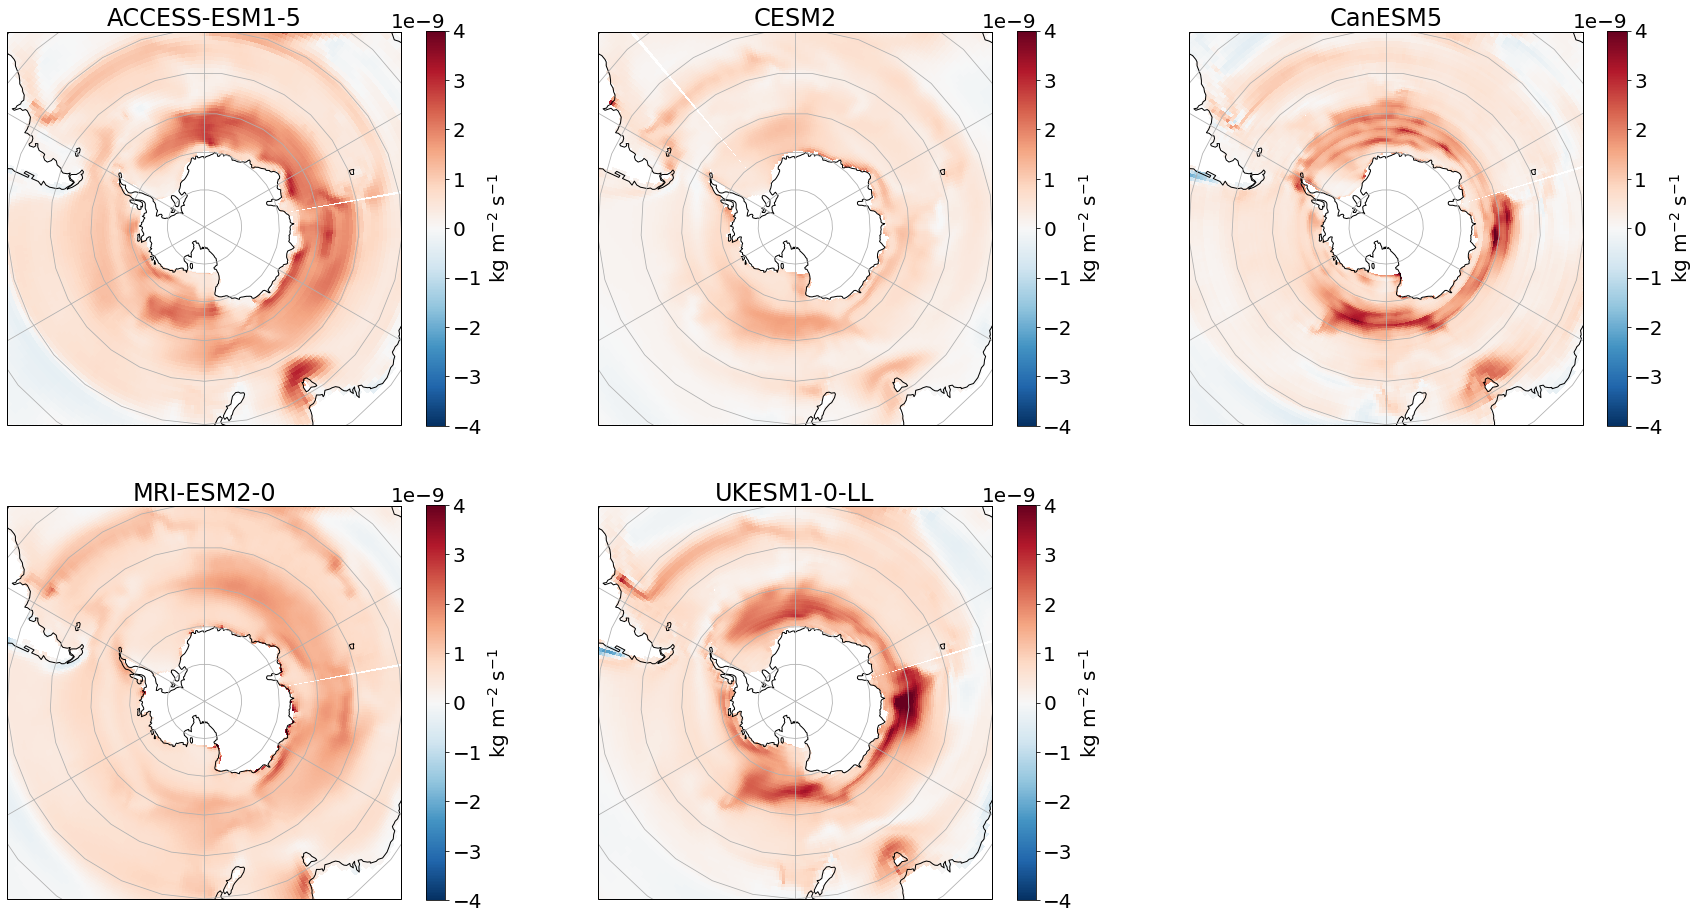

In [12]:
fig = plt.figure(1, figsize=(30, 16))

for n, key in enumerate(sorted(list(data_dict.keys()))):
    data = data_dict[key]
   
    im, axs = plot_stereo(fig, n+1, data, key)

In [13]:
fig.savefig('../figures/co2/fgco2_anomaly_esm.png',
            bbox_inches='tight')

In [6]:
test = sorted(list(ds_dict.keys()))

In [7]:
test

['ACCESS-ESM1-5', 'CESM2', 'CanESM5', 'MRI-ESM2-0', 'UKESM1-0-LL']